<a href="https://colab.research.google.com/github/lucasmsorrentino/FrameworksAI/blob/main/Trabalho_final_1_Classifica%C3%A7%C3%A3o_(RNA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FRA - Prática - Aula 10 - 2.4 Resolução de exercício de RNA - Classificação

---

# 1: Classificação (RNA)

#### 1. Importação das bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import random
import os

# Define a semente para garantir resultados reproduzíveis
seed_value = 42

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print(f"Sementes aleatórias fixadas em: {seed_value}")

Sementes aleatórias fixadas em: 42


---
#### 2. Importação dos dados

In [ ]:
# O dataset já vem separado em treino e teste
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


---
#### 3. Visualização das dimensões

In [ ]:
# Número de linhas e colunas
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
display(x_train)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Nomes das classes do Fashion MNIST (para facilitar a leitura)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

---
#### 4. Pré-processamento

In [ ]:
# Normalização dos valores dos pixels (de 0-255 para 0-1)
# Isso substitui o StandardScaler usado na aula para dados tabulares
x_train, x_test = x_train / 255.0, x_test / 255.0

#### 5. Criação do Modelo (Arquitetura)

In [ ]:
# Na aula10: Input(D) -> Dense(1, sigmoid)
# Aqui: Input(28, 28) -> Flatten -> Dense(10, softmax)

model = tf.keras.models.Sequential([
    Input(shape=(28, 28)),
    Flatten(),              #  Transforma matriz 28x28 em vetor de 784
    tf.keras.layers.Dense(128, activation='relu'),    # Camada Oculta
    tf.keras.layers.Dropout(0.2),                     # Dropout para evitar overfitting
    tf.keras.layers.Dense(10, activation='softmax')   # Saída - 10 neurónios para as 10 classes
])

#### 6. Compilação do Modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Perda para classificação multiclasse
              metrics=['accuracy'])

#### 7. Treinamento do Modelo

In [ ]:
print("Iniciando treinamento...")
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Iniciando treinamento...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7624 - loss: 0.6764 - val_accuracy: 0.8491 - val_loss: 0.4174
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8517 - loss: 0.4105 - val_accuracy: 0.8566 - val_loss: 0.3859
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8652 - loss: 0.3748 - val_accuracy: 0.8627 - val_loss: 0.3725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8720 - loss: 0.3513 - val_accuracy: 0.8637 - val_loss: 0.3662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8755 - loss: 0.3349 - val_accuracy: 0.8708 - val_loss: 0.3593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8819 - loss: 0.3240 - val_accuracy: 0.8731 - val_loss: 0.3555
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8842 - loss: 0.3103 - val_accuracy: 0.8742 - val_loss: 0.3569
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy:

#### 8. Resultados e Gráficos

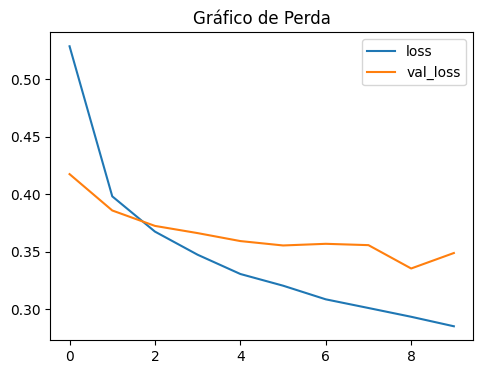

In [ ]:
# Gráfico de Perda (Loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Gráfico de Perda')
plt.legend()

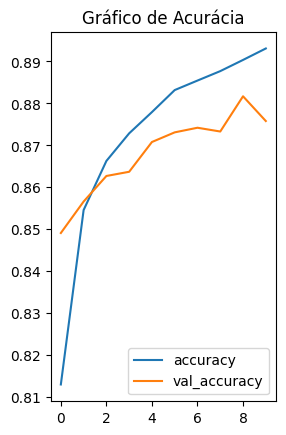

In [ ]:
# Gráfico de Acurácia (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Gráfico de Acurácia')
plt.legend()
plt.show()

In [ ]:
# Avaliação final
print("Train score:", model.evaluate(x_train, y_train, verbose=0))
print("Test score:", model.evaluate(x_test, y_test, verbose=0))

Train score: [0.2550276815891266, 0.9025999903678894]
Test score: [0.3488990068435669, 0.8758000135421753]


#### 9. Matriz de Confusão

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


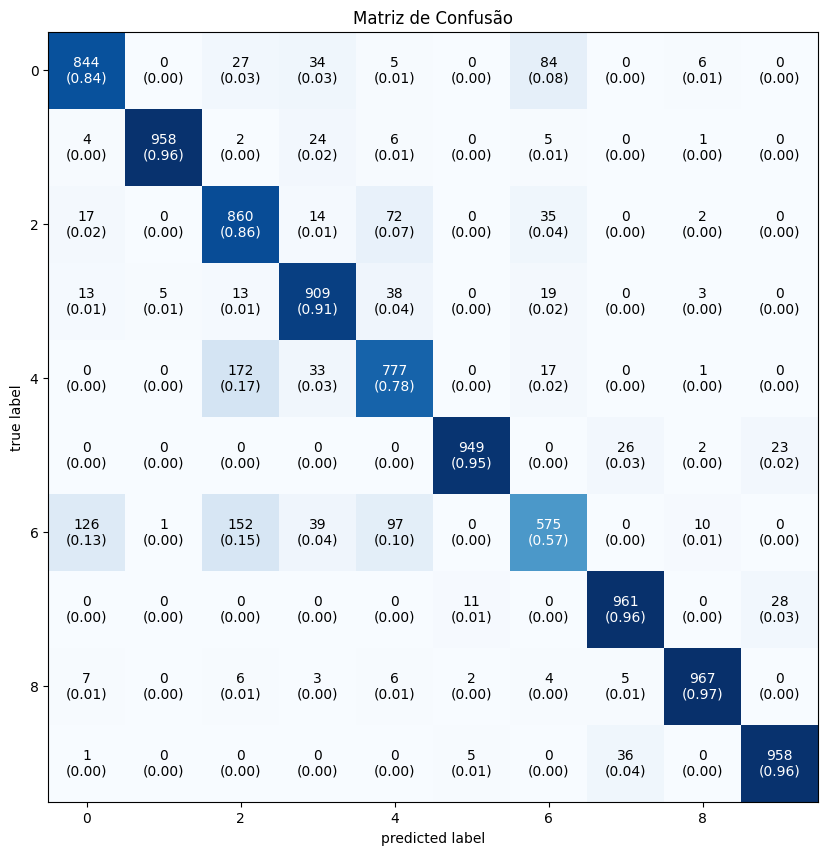

In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Converte probabilidades para a classe (0 a 9)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), show_normed=True)
plt.title('Matriz de Confusão')
plt.show()

#### 10.  Mostrar algumas classificações erradas

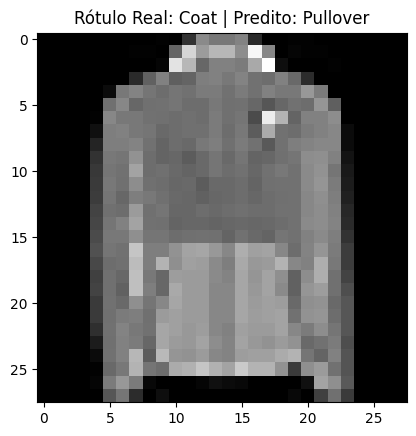

In [ ]:
# Encontrar índices onde a predição foi diferente do real
misclassified_idx = np.where(y_pred != y_test)[0]

# Escolher um índice aleatório dentre os erros
i = np.random.choice(misclassified_idx)

plt.imshow(x_test[i], cmap='gray')
plt.title(f"Rótulo Real: {class_names[y_test[i]]} | Predito: {class_names[y_pred[i]]}")
plt.show()

Relatório de Desempenho do Modelo
1. Avaliação Global (Métricas de Convergência) O modelo demonstrou um comportamento estável e previsível. A precisão final no conjunto de teste situou-se próxima dos 87,5%, com um total de 1242 classificações incorretas em 10.000 amostras.

Ao analisar o histórico de treino (epochs), observa-se uma rápida aprendizagem inicial até à época 5. A partir deste ponto, o ganho de desempenho tornou-se marginal e a perda de validação (val_loss) estabilizou em torno de 0.35. Isso indica que a arquitetura atual atingiu o seu limite técnico de capacidade para extrair padrões destas imagens.

2. Análise de Ambiguidade Visual (O Caso da Classe 'Shirt') A classe "Shirt" (Camisa) representou o maior desafio para o algoritmo, acumulando cerca de 425 erros (cerca de 34% do total de falhas). A análise da matriz de confusão revela que o erro não é aleatório, mas sim estrutural:

Confusão com 'Pullover' e 'Coat' (Casaco): Ocorreram cerca 244 erros somados entre estas duas classes. Isto deve-se à semelhança topológica: todas são peças de vestuário que cobrem o tronco e possuem mangas compridas. O modelo, limitado pela sua simplicidade, não conseguiu discernir detalhes finos como o tipo de colarinho ou a presença de fechos.

Confusão com 'T-shirt/top' e 'Shirt': Houve 210 ocorrências somadas erradas entre as classes. Aqui, a distinção depende apenas do comprimento da manga, um detalhe que pode tornar-se difuso na baixa resolução (28x28 pixels) das imagens.

3. Hierarquia de Complexidade Os resultados permitem dividir o conjunto de dados em dois níveis de dificuldade para a Inteligência Artificial:

Alta Confiabilidade: Classes com geometria distinta, como Trouser (Calças), Bag (Malas) e Ankle boot (Botins), apresentaram taxas de erro residuais.

Baixa Confiabilidade: Peças da parte superior do corpo (Shirt, Coat, Pullover) sofrem de sobreposição de características, onde a silhueta da peça não é suficiente para garantir uma identificação única.

Conclusão: O modelo é eficiente na categorização geral (separar calçado de roupa, ou calças de camisas), mas carece de refinamento para distinguir subcategorias visuais subtis (tipos específicos de agasalhos).

In [ ]:
# Cria um DataFrame temporário só com os erros
df_erros = pd.DataFrame({
    'Indice': np.where(y_test != y_pred)[0],
    'Real_Code': y_test[y_test != y_pred],
    'Predito_Code': y_pred[y_test != y_pred]
})


df_erros['Real_Nome'] = df_erros['Real_Code'].map(lambda x: class_names[x])
df_erros['Predito_Nome'] = df_erros['Predito_Code'].map(lambda x: class_names[x])

# Mostrar a contagem de erros por classe (Do que mais errou para o que menos errou)
print(f"Total de erros: {len(df_erros)} em 10.000 imagens de teste.\n")
print("--- QUANTIDADE DE ERROS POR CLASSE (REAL) ---")
print(df_erros['Real_Nome'].value_counts())

# Detalhe: Com o que é que ele confundiu a classe 'Shirt'? (Geralmente a campeã de erros)
print("\n--- DETALHE DA CLASSE 'Shirt' (Camisa) ---")
erros_shirt = df_erros[df_erros['Real_Nome'] == 'Shirt']
print("A classe 'Shirt' foi confundida com:")
print(erros_shirt['Predito_Nome'].value_counts())

Total de erros: 1242 em 10.000 imagens de teste.

--- QUANTIDADE DE ERROS POR CLASSE (REAL) ---
Real_Nome
Shirt          425
Coat           223
T-shirt/top    156
Pullover       140
Dress           91
Sandal          51
Trouser         42
Ankle boot      42
Sneaker         39
Bag             33
Name: count, dtype: int64

--- DETALHE DA CLASSE 'Shirt' (Camisa) ---
A classe 'Shirt' foi confundida com:
Predito_Nome
Pullover       152
T-shirt/top    126
Coat            97
Dress           39
Bag             10
Trouser          1
Name: count, dtype: int64


---

# Fim do código